In [77]:
import pandas as pd
import numpy as np
import datetime
import calendar
import matplotlib.pyplot as plt
from datetime import datetime

In [78]:
gastosPD=pd.read_csv("gastos_dd12391_diario_matriz.csv")


In [79]:
display(gastosPD)

,pk_anio,pk_mes,ngasto_d01,ngasto_d02,ngasto_d03,ngasto_d04,ngasto_d05,ngasto_d06,ngasto_d07,ngasto_d08,...,ngasto_d22,ngasto_d23,ngasto_d24,ngasto_d25,ngasto_d26,ngasto_d27,ngasto_d28,ngasto_d29,ngasto_d30,ngasto_d31
0,1943,6,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,1.393,0.658,1.673,1.569,7.532,4.538,4.757,1.487,1.795,NaN
1,1943,7,1.893,1.012,5.288,17.071,3.355,1.344,0.850,1.134,...,0.739,0.582,0.316,0.179,0.120,0.088,0.048,0.032,0.028,0.024
2,1943,8,0.031,0.031,0.036,0.064,0.046,0.407,0.949,1.856,...,2.667,0.684,0.841,0.885,0.326,0.986,12.812,5.901,2.280,1.228
3,1943,9,22.214,20.471,8.242,5.580,5.913,3.533,1.969,4.651,...,13.744,17.172,15.141,24.038,22.913,21.043,24.128,26.508,27.144,NaN
4,1943,10,24.836,20.363,17.854,16.817,15.774,14.281,11.540,9.687,...,5.526,5.036,4.883,5.311,4.687,4.479,4.217,3.921,3.138,3.141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,2014,8,3.621,3.030,2.161,1.903,1.002,0.847,0.642,0.623,...,5.965,11.059,9.755,12.194,13.507,6.523,3.399,2.670,1.693,2.049
843,2014,9,2.180,1.584,1.414,1.529,6.517,16.167,14.353,10.175,...,0.666,0.540,0.252,0.000,0.000,0.000,0.000,0.000,0.000,NaN
844,2014,10,0.000,1.672,4.473,4.846,5.244,5.603,9.096,10.628,...,1.273,0.883,0.774,0.761,0.699,0.540,0.434,0.049,0.000,0.000
845,2014,11,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN


In [80]:
#print(datetime.datetime(2018, 1, 1))
display(gastosPD.iloc[840])

pk_anio       2014.000
pk_mes           6.000
ngasto_d01       6.161
ngasto_d02       4.502
ngasto_d03       2.826
ngasto_d04       1.904
ngasto_d05       1.194
ngasto_d06       3.810
ngasto_d07       3.797
ngasto_d08       3.336
ngasto_d09       2.526
ngasto_d10       2.126
ngasto_d11       1.563
ngasto_d12       1.272
ngasto_d13       0.731
ngasto_d14       0.063
ngasto_d15       0.000
ngasto_d16       0.000
ngasto_d17       0.000
ngasto_d18       0.000
ngasto_d19       0.700
ngasto_d20       3.848
ngasto_d21      11.247
ngasto_d22      18.025
ngasto_d23      13.712
ngasto_d24       9.344
ngasto_d25       8.283
ngasto_d26      10.027
ngasto_d27      22.199
ngasto_d28      20.537
ngasto_d29      13.794
ngasto_d30       7.447
ngasto_d31         NaN
Name: 840, dtype: float64

In [88]:
def convert(fila):
    año_int=int(fila[0])
    mes_int=int(fila[1])
    inicio=str(año_int)+'/'+str(mes_int)+'/01'
    dias=calendar.monthrange(año_int,mes_int)[1]
    fechas=pd.Series(pd.date_range(inicio, freq="D", periods=dias),name="Fecha")
    gastos=fila[2:dias+2].values
    serie=pd.Series(gastos,index=fechas)
    return serie

In [89]:
serie=convert(gastosPD.iloc[0])
for i in range(1,len(gastosPD)):
    ts=convert(gastosPD.iloc[i])
    serie=pd.concat([serie,ts])

q=serie.asfreq(freq="D")
q.to_csv("Gastos_diarios.csv")
display(q)


Fecha
1943-06-01    0.0
1943-06-02    0.0
1943-06-03    0.0
1943-06-04    0.0
1943-06-05    0.0
             ... 
2014-12-27    0.0
2014-12-28    0.0
2014-12-29    0.0
2014-12-30    0.0
2014-12-31    0.0
Freq: D, Length: 26147, dtype: float64

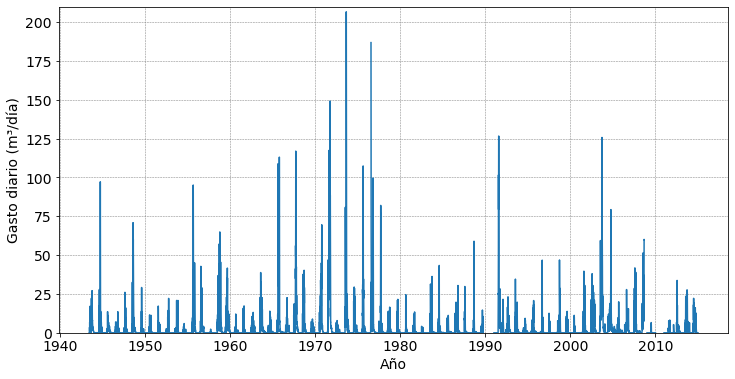

In [97]:
plt.figure(figsize=(12, 6))
plt.xlabel('Año')
plt.ylabel('Gasto diario (m³/día)')
plt.ylim([0, 210])
#plt.xlim([fi,ff])
plt.rc('font', size=14)   
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.plot(q)
plt.savefig("gastos.pdf",bbox_inches='tight')